# 3. Named-entity recognition

Bab ini akan memperkenalkan topik yang sedikit lebih maju: **named-entity recognition**. Anda akan belajar bagaimana mengidentifikasi siapa, apa, dan di mana teks Anda menggunakan model *pre-trained* pada teks bahasa Inggris dan non-Inggris. Anda juga akan belajar cara menggunakan beberapa library baru, `polyglot` dan `spaCy`, untuk ditambahkan ke NLP toolbox Anda.

### What is Named Entity Recognition?

* Tugas NLP untuk mengidentifikasi entitas bernama penting dalam teks
* Orang, tempat, organisasi
* Tanggal, negara bagian, karya seni
* ...dan kategori lainnya!
* Dapat digunakan bersamaan dengan identifikasi topik
  * ...atau sendiri!
* Siapa? Apa? Kapan? Dimana?

### Example of NER

(Source: Europeana Newspapers (http://www.europeana-newspapers.eu))

<img src="datasets/ner.png" width=500px height=500px align=left />

### nltk and the Stanford CoreNLP Library

* The Stanford CoreNLP library:
  * Diintegrasikan ke dalam Python via nltk
  * Berbasis Java
  * Dukungan untuk NER serta pohon-pohon coreference dan dependensi

### Using nltk for Named Entity Recognition

In [3]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:
sentence = '''In New York, I like to ride the Metro to visit MOMA
              and some restaurants rated well by Ruth Reichl.'''
tokenized_sent = nltk.word_tokenize(sentence)
tagged_sent = nltk.pos_tag(tokenized_sent)
tagged_sent[:3]

[('In', 'IN'), ('New', 'NNP'), ('York', 'NNP')]

### nltk `ne_chunk()`

In [6]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [8]:
nltk.download('words')

[nltk_data] Downloading package words to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [9]:
print(nltk.ne_chunk(tagged_sent))

(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


### Practice:  NER with NLTK

Anda sekarang akan bersenang-senang dengan named-entity recognition! Artikel berita yang discraped telah dimuat sebelumnya ke ruang kerja Anda. Tugas Anda adalah menggunakan `nltk` untuk menemukan entitas yang disebutkan dalam artikel ini.

Tentang apa artikel itu, mengingat nama-nama yang Anda temukan?

In [95]:
from zipfile import ZipFile

with ZipFile("datasets/News articles.zip") as myzip:
    with myzip.open("News articles/uber_apple.txt") as myfile:
        article = myfile.read().decode("ascii", "ignore")

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [97]:
# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apples/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valleys/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


### Charting practice

Dalam latihan ini, Anda akan menggunakan beberapa *named entities* yang diekstraksi dan pengelompokannya dari serangkaian artikel surat kabar untuk memetakan keragaman jenis entitas yang disebutkan dalam artikel.

Anda akan menggunakan `defaultdict` yang disebut `ner_categories`, dengan kunci yang mewakili setiap jenis grup *named entity*, dan nilai-nilai untuk menghitung jumlah setiap jenis *named entities* berbeda. Anda memiliki list kalimat chunked yang disebut `chunked_sentences` yang mirip dengan latihan terakhir, tetapi kali ini dengan nama kategori non-biner.

Anda dapat menggunakan `hasattr()` untuk menentukan apakah setiap chunk memiliki `'label'` dan kemudian cukup gunakan metode `.label()` chunk sebagai kunci dictionary.

In [128]:
# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)

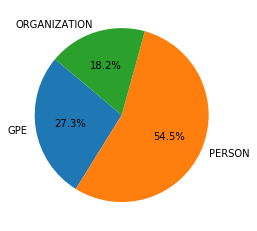

In [129]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

## Introduction to SpaCy

### What is SpaCy?

* NLP library mirip dengan gensim, dengan implementasi yang berbeda
* Fokus pada pembuatan NLP pipelines untuk menghasilkan model dan corpora
* Open-source, dengan tambahan libraries dan tools tambahan
  * Displacy

### Displacy entity recognition visualizer

(source: https://demos.explosion.ai/displacy-ent/)

<img src="datasets/displacy.png" width=700px height=700px align=left />

### SpaCy NER

When showing error install : `python3 -m spacy download en_core_web_sm`

In [132]:
# !pip install spacy

In [3]:
import spacy

nlp = spacy.load('en_core_web_sm')
nlp.entity

In [4]:
doc = nlp("Berlin is the capital of Germany and the residence of Chancellor Angela Merkel.")
doc.ents

(Berlin, Germany, Angela Merkel)

In [5]:
print(doc.ents[0], doc.ents[0].label_)

Berlin GPE


### Why use SpaCy for NER?

* Pembuatan pipaline yang mudah
* Jenis entitas yang berbeda dibandingkan dengan nltk
* Bahasa informal corpora
  * Mudah menemukan entitas di Tweet dan pesan obrolan
* Tumbuh dengan cepat!

### Comparing NLTK with spaCy NER

Menggunakan teks yang sama dengan yang Anda gunakan pada latihan pertama bab ini, Anda sekarang akan melihat hasilnya menggunakan annotator NER spaCy's. Bagaimana perbandingan keduannya?

Artikel telah dimuat sebagai `article`. Untuk meminimalkan waktu eksekusi, Anda akan diminta untuk menentukan keyword arguments `tagger=False, parser=False, matcher=False` saat memuat model spaCy, karena Anda hanya peduli dengan `entity` dalam latihan ini.

In [5]:
from zipfile import ZipFile

with ZipFile("datasets/News articles.zip") as myzip:
    with myzip.open("News articles/uber_apple.txt") as myfile:
        article = myfile.read().decode("ascii", "ignore")

In [13]:
# Import spacy
import spacy

# Instantiate the English model: nlp
nlp = spacy.load('en_core_web_sm')

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG Uber
PERSON Uber
ORG unroll.me
ORG Apples
PERSON Uber
PERSON Travis Kalanick
PERSON Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
NORP Silicon
ORG Yahoo
PERSON Marissa Mayer
MONEY $186m


### spaCy NER Categories

Manakah kategori tambahan yang digunakan `spacy` dibandingkan dengan `nltk` dalam named-entity recognition?

* **NORP, CARDINAL, MONEY, WORKOFART, LANGUAGE, EVENT**

## Multilingual NER with polyglot

### What is polyglot?

<img src="datasets/polyglot.png" width=200px height=200px align=left />

* NLP library yang menggunakan vektor kata
* Mengapa polyglot?
  * Vektor untuk berbagai bahasa
  * Lebih dari 130!
  

### Spanish NER with polyglot

Additional installation: 

* `pip install -U git+https://github.com/aboSamoor/polyglot.git@master`
* `polyglot download embeddings2.es`
* `polyglot download ner2.es`

In [16]:
# !pip install polyglot

In [3]:
from polyglot.text import Text

text = """El presidente de la Generalitat de Cataluña,
          Carles Puigdemont, ha afirmado hoy a la alcaldesa
          de Madrid, Manuela Carmena, que en su etapa de
          alcalde de Girona (de julio de 2011 a enero de 2016)
          hizo una gran promoción de Madrid."""
ptext = Text(text)
ptext.entities

[I-ORG(['Generalitat', 'de']),
 I-LOC(['Generalitat', 'de', 'Cataluña']),
 I-PER(['Carles', 'Puigdemont']),
 I-LOC(['Madrid']),
 I-PER(['Manuela', 'Carmena']),
 I-LOC(['Girona']),
 I-LOC(['Madrid'])]

### French NER with polyglot I

Dalam latihan ini dan selanjutnya, Anda akan menggunakan library `polyglot` untuk mengidentifikasi entitas Perancis. Fungsi library sedikit berbeda dari spacy, jadi Anda akan menggunakan beberapa hal baru yang Anda pelajari di video terakhir untuk menampilkan teks dan kategori entitas yang disebutkan.

Install:
 * `polyglot download embeddings2.en`
 * `polyglot download ner2.en`
 * `polyglot download embeddings2.fr`
 * `polyglot download ner2.fr`

In [11]:
from zipfile import ZipFile

with ZipFile("datasets/News articles.zip") as myzip:
    with myzip.open("News articles/french.txt") as myfile:
        article = myfile.read().decode("ascii", "ignore")

In [13]:
# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

# Print each of the entities found
for ent in txt.entities:
    print(ent)
    
# Print the type of ent
print(type(ent))

['Charles', 'Cuvelliez']
['lhomme']
['lalgorithme']
['Charles', 'Cuvelliez']
["l'universit"]
['Bruxelles']
['prcipitamment']
['supplmentaires']
['Julien', 'Maldonato']
['Deloitte']
['lauteur']
['donn']
['Ethiquement']
['.']
<class 'polyglot.text.Chunk'>


### French NER with polyglot II

Di sini, Anda akan menyelesaikan pekerjaan yang Anda mulai pada latihan sebelumnya.

Tugas Anda adalah menggunakan list comprehension untuk membuat list tuple, di mana elemen pertama adalah tag entitas, dan elemen kedua adalah string penuh dari teks entitas.

In [14]:
# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
print(entities)

[('I-PER', 'Charles Cuvelliez'), ('I-PER', 'lhomme'), ('I-PER', 'lalgorithme'), ('I-PER', 'Charles Cuvelliez'), ('I-LOC', "l'universit"), ('I-ORG', 'Bruxelles'), ('I-PER', 'prcipitamment'), ('I-PER', 'supplmentaires'), ('I-PER', 'Julien Maldonato'), ('I-ORG', 'Deloitte'), ('I-PER', 'lauteur'), ('I-PER', 'donn'), ('I-PER', 'Ethiquement'), ('I-PER', '.')]


### Spanish NER with polyglot

Anda akan melanjutkan eksplorasi `polyglot` Anda sekarang dengan beberapa anotasi bahasa Spanyol. Artikel ini tidak ditulis oleh surat kabar, jadi ini adalah contoh pertama Anda dari teks yang lebih mirip blog. Bagaimana menurut Anda perbandingan ketika menemukan entitas?

Objek `Text` telah dibuat sebagai `txt`, dan setiap entitas telah dicetak, seperti yang Anda lihat di Shell IPython.

Tugas spesifik Anda adalah menentukan berapa banyak entitas yang mengandung kata `"Márquez"` atau `"Gabo"` - ini merujuk ke orang yang sama dengan cara yang berbeda!

In [22]:
with open("datasets/spanish.txt") as f:
    article = f.read()
        
# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

In [24]:
# Initialize the count variable: count
count = 0

# Iterate over all the entities
for ent in txt.entities:
    # Check whether the entity contains 'Márquez' or 'Gabo'
    if "Márquez" in ent or "Gabo" in ent:
        # Increment count
        count += 1

# Print count
print(count)

# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count / len(txt.entities)
print(percentage)

4
0.26666666666666666
